In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from perceptron import Perceptron

In [61]:
data = pd.read_csv("abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [62]:
data["Sex"] = data["Sex"].replace(["F","M","I"],[0,1,2])
data["Sex"].head().reset_index()

C:\Users\ComputerKosar\AppData\Local\Temp\ipykernel_11392\3447023245.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Sex"] = data["Sex"].replace(["F","M","I"],[0,1,2])


,index,Sex
0,0,1
1,1,1
2,2,0
3,3,1
4,4,2


In [63]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [64]:
X = data["Height"].values
Y = data["Length"].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
print(X.shape)
print(Y.shape)

(4177, 1)
(4177, 1)


In [65]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [66]:
model = Perceptron(1,0.01,50)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


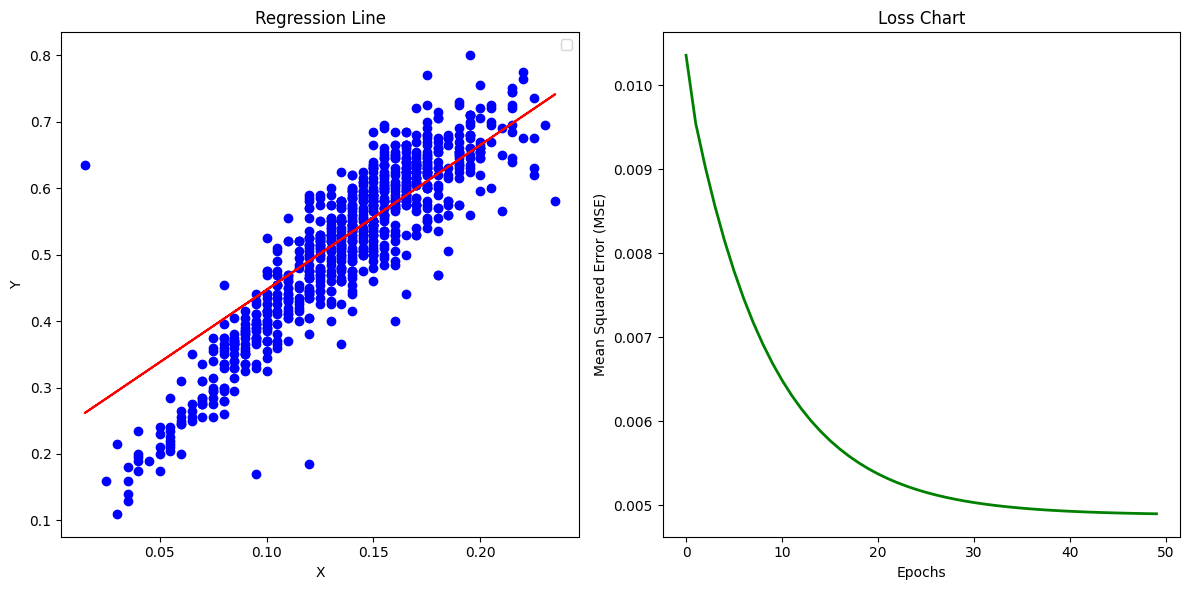

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(X_test, Y_test, color='blue')
axes[0].plot(X_test, Y_pred, color='red')
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Regression Line")
axes[0].legend()

axes[1].plot(range(len(model.loss_history)), model.loss_history, color='green', linewidth=2)
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Mean Squared Error (MSE)")
axes[1].set_title("Loss Chart")
plt.tight_layout() 
plt.show()

In [68]:
mse = model.evaluate(X_test, Y_test)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0037322811437131165
